Import necessary libraries 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score


Reading csv file and converting into DataFrame

In [26]:
df = pd.read_csv('tennis.csv')
df

,Outlook,Temp,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


Since the machine cannot unserstand categorical value such as string for trainig and the dataset contains categorical value converting categorical values using LabelEncoder and creating new DataFrame   

In [27]:
"""Initilizing LabelEncoder object"""
encode = LabelEncoder()
df_category = pd.DataFrame()
df_category['Outlook'] = encode.fit_transform(df['Outlook'])
df_category['Temp'] = encode.fit_transform(df['Temp'])
df_category['Humidity'] = encode.fit_transform(df['Humidity'])
df_category['Wind'] = encode.fit_transform(df['Wind'])
df_category['PlayTennis'] = encode.fit_transform(df['PlayTennis'])
df_category

,Outlook,Temp,Humidity,Wind,PlayTennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


As our model is supervised ml model identifying the input data and output as X and y resppectively 

In [28]:
X = df_category.drop(['PlayTennis'],axis=1)
y=df_category['PlayTennis']

In [30]:
"""Initilizing DecisionTreeClassifier and by default the crietion is gini as per our course we are using entropy setting criterion to entropy """
df_clf = DecisionTreeClassifier(criterion='entropy')
df_clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

Make Prediction

In [32]:
y_pred = df_clf.predict(X)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

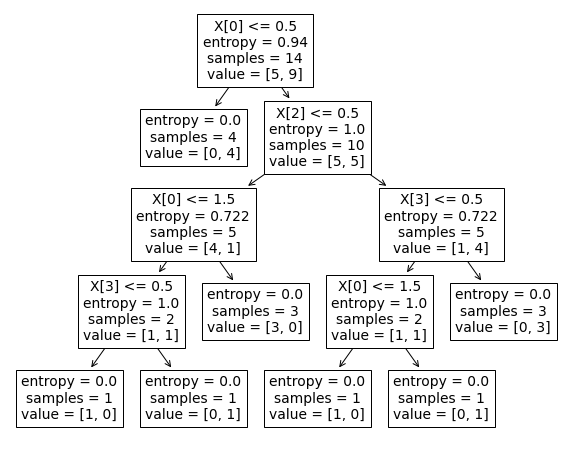

In [24]:
"""Visualizing the tree"""
plt.figure(figsize=(10, 8))
tree.plot_tree(df_clf)
plt.show()